In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Get Data and Create Normalised Version

In [6]:
from sklearn.preprocessing import StandardScaler

# Load the data from realestate.csv
data = np.loadtxt('realestate.csv',delimiter=',')
# Assuming the last column is the target variable
X = data[:, :-1]  # Features
y = data[:, -1]   # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

# Add scaling here
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


print("Data loaded and split into training and test sets.")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Print scaling effect
print("\nScaling effect on features:")
print("Before scaling:")
print(f"Mean: {X_train.mean(axis=0).round(3)}")
print(f"Std: {X_train.std(axis=0).round(3)}")
print("\nAfter scaling:")
print(f"Mean: {X_train_scaled.mean(axis=0).round(3)}")
print(f"Std: {X_train_scaled.std(axis=0).round(3)}")







Data loaded and split into training and test sets.
Training set shape: (331, 3)
Test set shape: (83, 3)

Scaling effect on features:
Before scaling:
Mean: [  17.289 1059.604    4.145]
Std: [  11.31  1216.088    2.949]

After scaling:
Mean: [-0. -0.  0.]
Std: [1. 1. 1.]


K-Nearest Neighbors training and prediction

In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


#####  NO NORMALISATION
# Create a kNN model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)


#modify the model training to use scaled data
#Scaled kNN
scaled_knn_model = KNeighborsRegressor(n_neighbors=5)
scaled_knn_model.fit(X_train_scaled, y_train)
scaled_y_pred = scaled_knn_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#evaluate scaled model
scaled_mse = mean_squared_error(y_test, scaled_y_pred)
scaled_r2 = r2_score(y_test, scaled_y_pred)


Linear Regression training and prediction

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)



#Scaled Linear Regression
scaled_lr_model = LinearRegression()
scaled_lr_model.fit(X_train_scaled, y_train)
scaled_y_pred_lr = scaled_lr_model.predict(X_test_scaled)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

scaled_mse_lr = mean_squared_error(y_test, scaled_y_pred_lr)
scaled_r2_lr = r2_score(y_test, scaled_y_pred_lr)




Random Forest training and prediction

In [9]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


#Scaled Random Forest
scaled_rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
scaled_rf_model.fit(X_train_scaled, y_train)
scaled_y_pred_rf = scaled_rf_model.predict(X_test_scaled)


mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

scaled_mse_rf = mean_squared_error(y_test, scaled_y_pred_rf)
scaled_r2_rf = r2_score(y_test, scaled_y_pred_rf)



Decision Tree training and prediction

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)


#Scaled Decision Tree
scaled_dt_model = DecisionTreeRegressor(random_state=42)
scaled_dt_model.fit(X_train_scaled, y_train)
scaled_y_pred_dt = scaled_dt_model.predict(X_test_scaled)

# Evaluate the model
scaled_mse_dt = mean_squared_error(y_test, scaled_y_pred_dt)
scaled_r2_dt = r2_score(y_test, scaled_y_pred_dt)


# # Optional: Visualize feature importance
# feature_importance = pd.DataFrame({
#     'feature': [f'Feature {i+1}' for i in range(X_train.shape[1])],
#     'importance': dt_model.feature_importances_
# })
# feature_importance = feature_importance.sort_values('importance', ascending=False)

# plt.figure(figsize=(10, 6))
# plt.bar(feature_importance['feature'], feature_importance['importance'])
# plt.title('Feature Importance in Decision Tree Model')
# plt.xlabel('Features')
# plt.ylabel('Importance')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()



Printing MSE and R-Squared metrics for all models

In [11]:
# Compare the models
print("\nModel Comparison:")
print("=" * 150)
print(f"{'Metric':<20} {'kNN':>15} {'Scaled kNN':>15} {'Linear Reg':>15} {'Scaled Lin Reg':>15} {'Random Forest':>15} {'Scaled RF':>15} {'Decision Tree':>15} {'Scaled DT':>15}")
print("-" * 150)
print(f"{'MSE':<20} {mse:>15.4f} {scaled_mse:>15.4f} {mse_lr:>15.4f} {scaled_mse_lr:>15.4f} {mse_rf:>15.4f} {scaled_mse_rf:>15.4f} {mse_dt:>15.4f} {scaled_mse_dt:>15.4f}")
print(f"{'R-squared':<20} {r2:>15.4f} {scaled_r2:>15.4f} {r2_lr:>15.4f} {scaled_r2_lr:>15.4f} {r2_rf:>15.4f} {scaled_r2_rf:>15.4f} {r2_dt:>15.4f} {scaled_r2_dt:>15.4f}")


Model Comparison:
Metric                           kNN      Scaled kNN      Linear Reg  Scaled Lin Reg   Random Forest       Scaled RF   Decision Tree       Scaled DT
------------------------------------------------------------------------------------------------------------------------------------------------------
MSE                          54.0402         43.6425         58.8883         58.8883         38.8760         37.8172         90.8995         88.6981
R-squared                     0.6779          0.7399          0.6490          0.6490          0.7683          0.7746          0.4582          0.4713


Graph Drawing 

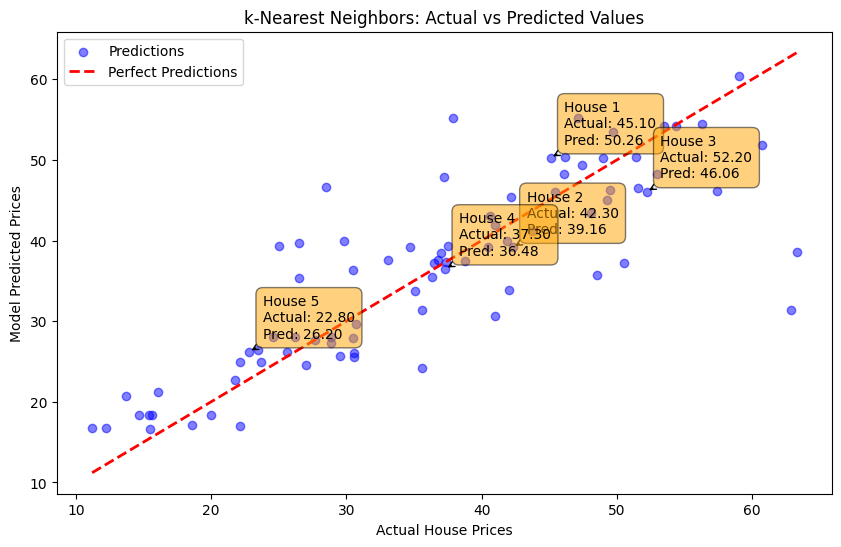


k-Nearest Neighbors - Example Predictions vs Actual Values:
  House       Actual        Predicted     Difference   
--------------------------------------------------
    1          45.10          50.26          5.16      
    2          42.30          39.16          3.14      
    3          52.20          46.06          6.14      
    4          37.30          36.48          0.82      
    5          22.80          26.20          3.40      


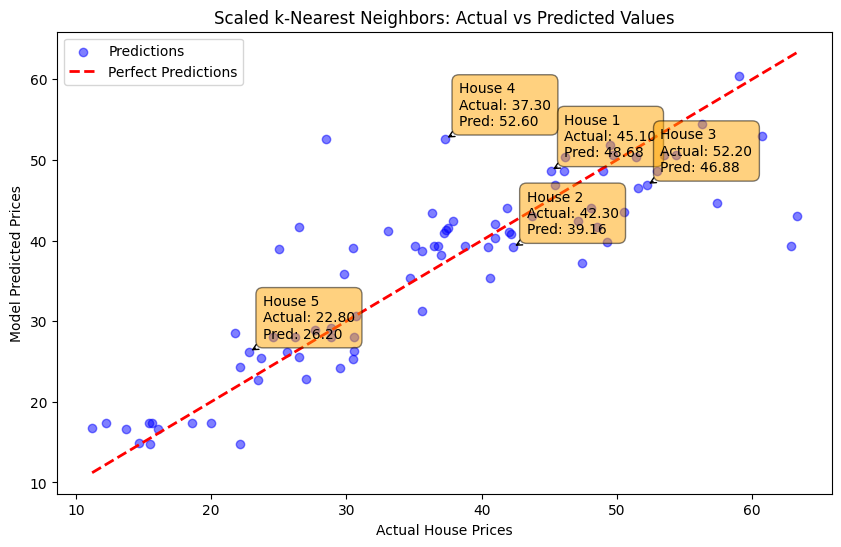


Scaled k-Nearest Neighbors - Example Predictions vs Actual Values:
  House       Actual        Predicted     Difference   
--------------------------------------------------
    1          45.10          48.68          3.58      
    2          42.30          39.16          3.14      
    3          52.20          46.88          5.32      
    4          37.30          52.60          15.30     
    5          22.80          26.20          3.40      


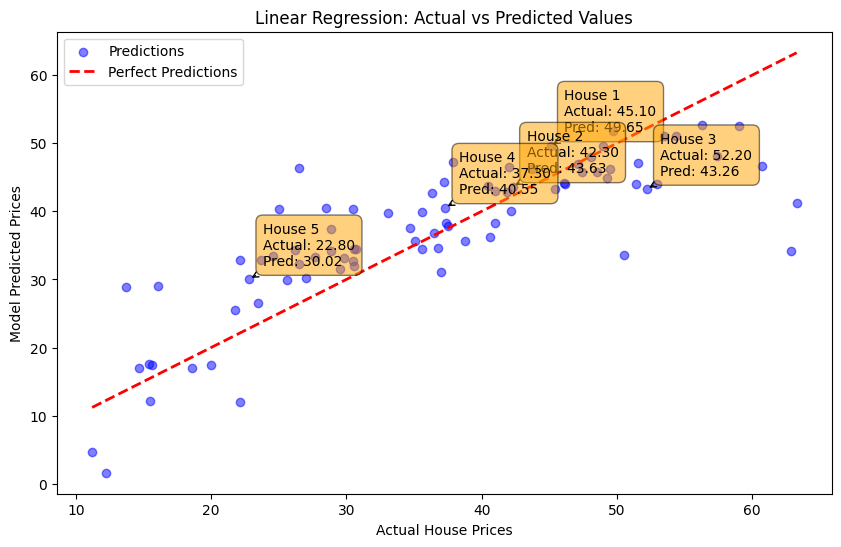


Linear Regression - Example Predictions vs Actual Values:
  House       Actual        Predicted     Difference   
--------------------------------------------------
    1          45.10          49.65          4.55      
    2          42.30          43.63          1.33      
    3          52.20          43.26          8.94      
    4          37.30          40.55          3.25      
    5          22.80          30.02          7.22      


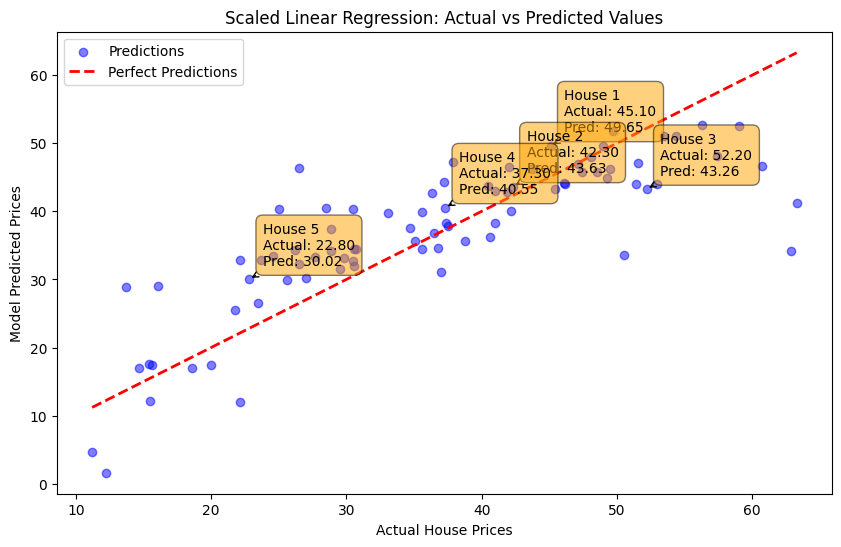


Scaled Linear Regression - Example Predictions vs Actual Values:
  House       Actual        Predicted     Difference   
--------------------------------------------------
    1          45.10          49.65          4.55      
    2          42.30          43.63          1.33      
    3          52.20          43.26          8.94      
    4          37.30          40.55          3.25      
    5          22.80          30.02          7.22      


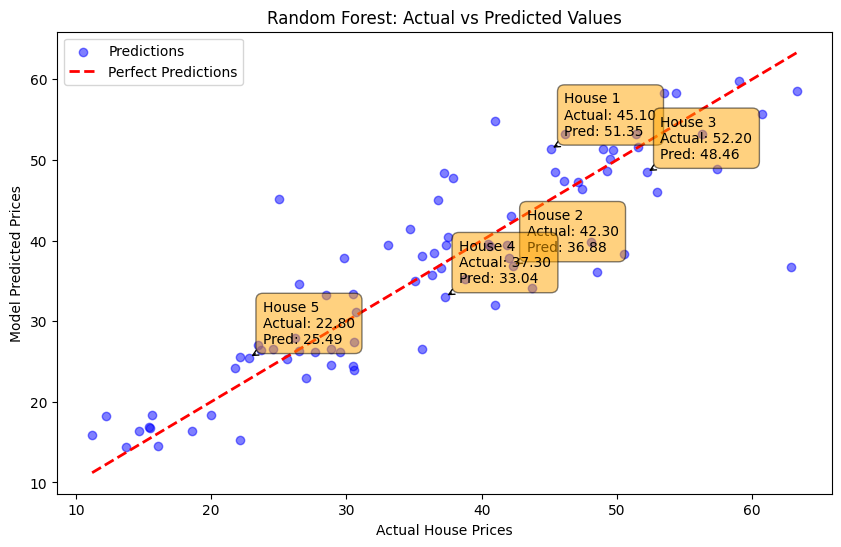


Random Forest - Example Predictions vs Actual Values:
  House       Actual        Predicted     Difference   
--------------------------------------------------
    1          45.10          51.35          6.25      
    2          42.30          36.88          5.42      
    3          52.20          48.46          3.74      
    4          37.30          33.04          4.26      
    5          22.80          25.49          2.69      


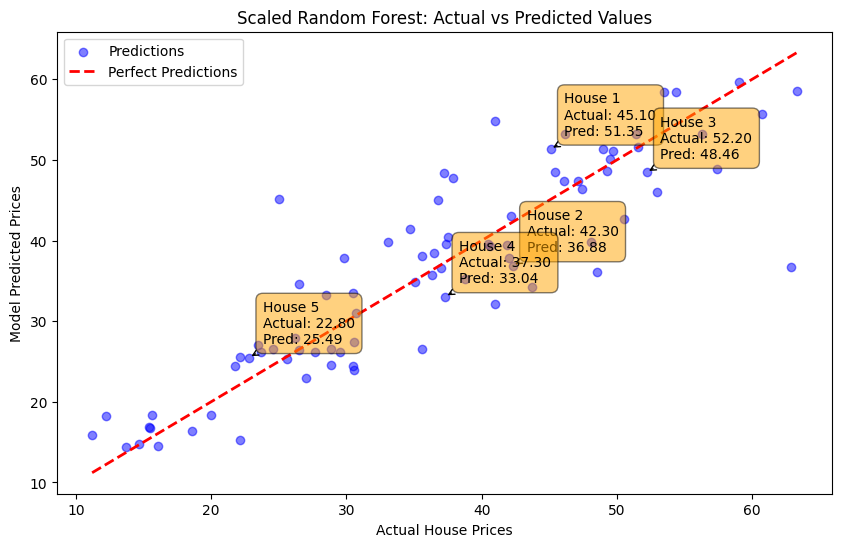


Scaled Random Forest - Example Predictions vs Actual Values:
  House       Actual        Predicted     Difference   
--------------------------------------------------
    1          45.10          51.35          6.25      
    2          42.30          36.88          5.42      
    3          52.20          48.46          3.74      
    4          37.30          33.04          4.26      
    5          22.80          25.49          2.69      


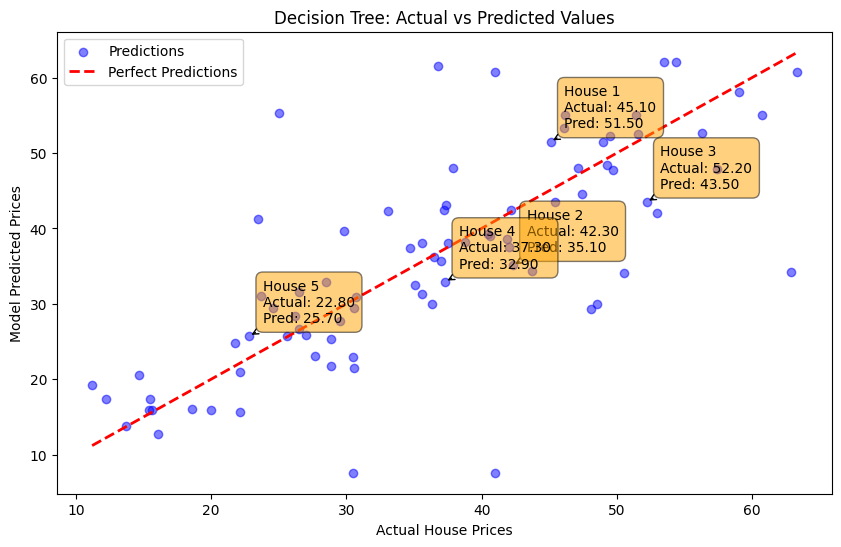


Decision Tree - Example Predictions vs Actual Values:
  House       Actual        Predicted     Difference   
--------------------------------------------------
    1          45.10          51.50          6.40      
    2          42.30          35.10          7.20      
    3          52.20          43.50          8.70      
    4          37.30          32.90          4.40      
    5          22.80          25.70          2.90      


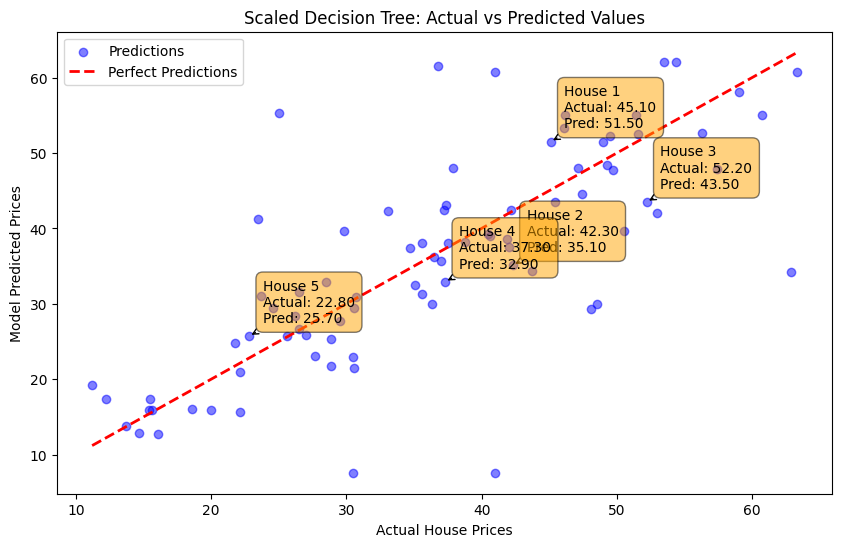


Scaled Decision Tree - Example Predictions vs Actual Values:
  House       Actual        Predicted     Difference   
--------------------------------------------------
    1          45.10          51.50          6.40      
    2          42.30          35.10          7.20      
    3          52.20          43.50          8.70      
    4          37.30          32.90          4.40      
    5          22.80          25.70          2.90      

Overall Model Comparison:
Metric                           kNN Linear Regression   Random Forest   Decision Tree
-------------------------------------------------------------------------------------
MSE                          54.0402         58.8883         38.8760         90.8995
R-squared                     0.6779          0.6490          0.7683          0.4582

Overall Scaled Model Comparison:
Metric                    Scaled kNN       Scaled LR       Scaled RF       Scaled DT
--------------------------------------------------------------

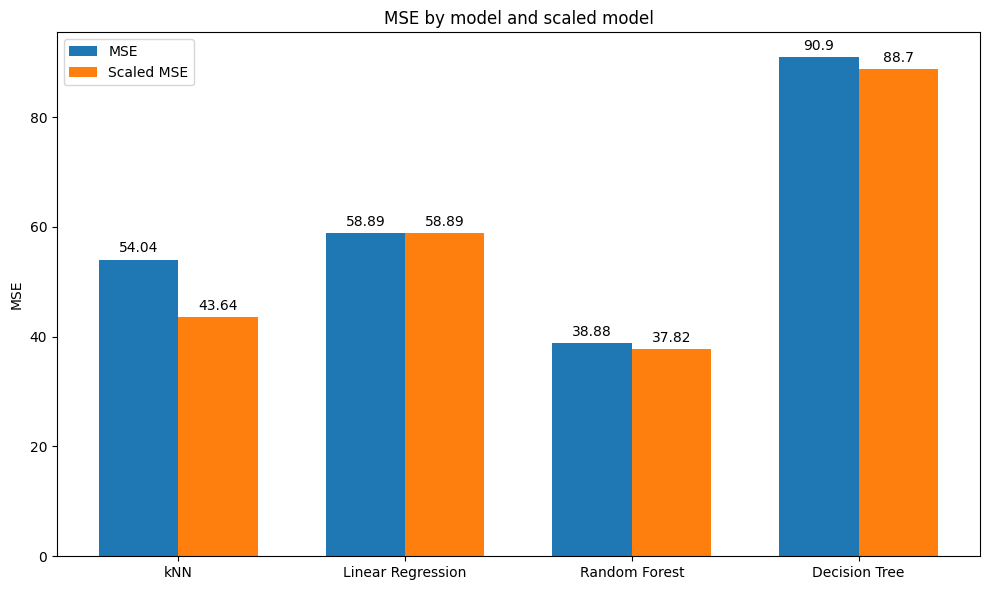

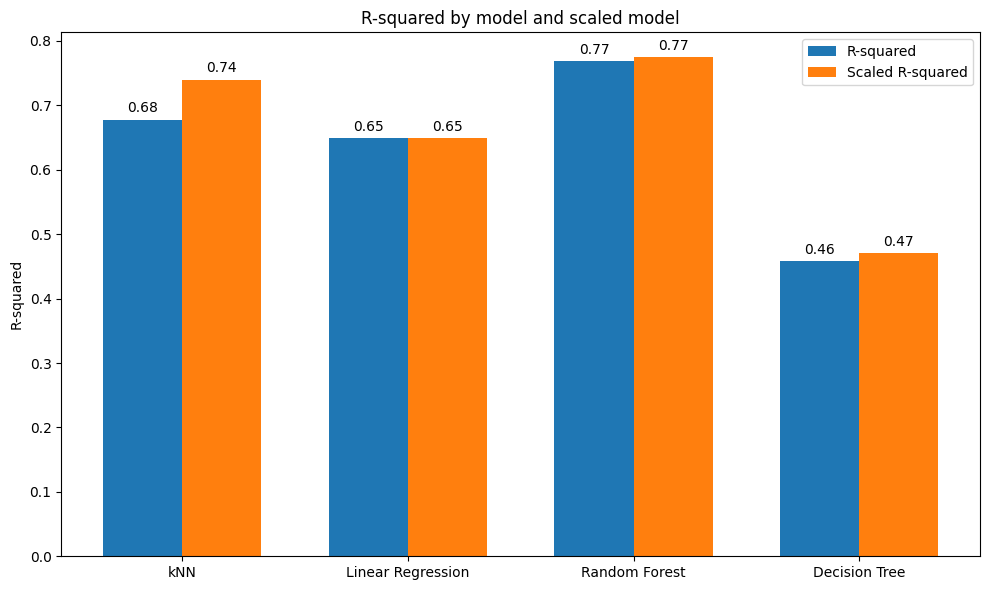

In [17]:
# Function to create enhanced plots and comparison
def plot_model_predictions(y_true, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, color='blue', alpha=0.5, label='Predictions')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2, label='Perfect Predictions')
    plt.xlabel("Actual House Prices")
    plt.ylabel("Model Predicted Prices")
    plt.title(f"{model_name}: Actual vs Predicted Values")
    plt.legend()

    # Add annotations for first 5 points
    for i in range(min(5, len(y_true))):
        plt.annotate(f'House {i+1}\nActual: {y_true[i]:.2f}\nPred: {y_pred[i]:.2f}',
                    xy=(y_true[i], y_pred[i]),
                    xytext=(10, 10), textcoords='offset points',
                    bbox=dict(boxstyle='round,pad=0.5', fc='orange', alpha=0.5),
                    arrowprops=dict(arrowstyle='->'))
    plt.show()

    # Print comparison table
    print(f"\n{model_name} - Example Predictions vs Actual Values:")
    print("=" * 50)
    print(f"{'House':^10}{'Actual':^15}{'Predicted':^15}{'Difference':^15}")
    print("-" * 50)
    for i in range(5):
        diff = abs(y_true[i] - y_pred[i])
        print(f"{i+1:^10}{y_true[i]:^15.2f}{y_pred[i]:^15.2f}{diff:^15.2f}")

# Plot for kNN model
plot_model_predictions(y_test, y_pred, "k-Nearest Neighbors")
#plot for scaled kNN model
plot_model_predictions(y_test, scaled_y_pred, "Scaled k-Nearest Neighbors")

# Plot for Linear Regression model
plot_model_predictions(y_test, y_pred_lr, "Linear Regression")
#plot for scaled Linear Regression
plot_model_predictions(y_test, scaled_y_pred_lr, "Scaled Linear Regression")

# Plot for Random Forest model
plot_model_predictions(y_test, y_pred_rf, "Random Forest")
#plot for scaled Random Forests
plot_model_predictions(y_test, scaled_y_pred_rf, "Scaled Random Forest")

# Plot for Decision Tree model
plot_model_predictions(y_test, y_pred_dt, "Decision Tree")
#plot for scaled Decision Trees
plot_model_predictions(y_test, scaled_y_pred_dt, "Scaled Decision Tree")

# Final comparison of all models
print("\nOverall Model Comparison:")
print("=" * 85)
print(f"{'Metric':<20} {'kNN':>15} {'Linear Regression':>15} {'Random Forest':>15} {'Decision Tree':>15}")
print("-" * 85)
print(f"{'MSE':<20} {mse:>15.4f} {mse_lr:>15.4f} {mse_rf:>15.4f} {mse_dt:>15.4f}")
print(f"{'R-squared':<20} {r2:>15.4f} {r2_lr:>15.4f} {r2_rf:>15.4f} {r2_dt:>15.4f}")

# Scaled models comparison
print("\nOverall Scaled Model Comparison:")
print("=" * 85)
print(f"{'Metric':<20} {'Scaled kNN':>15} {'Scaled LR':>15} {'Scaled RF':>15} {'Scaled DT':>15}")
print("-" * 85)
print(f"{'MSE':<20} {scaled_mse:>15.4f} {scaled_mse_lr:>15.4f} {scaled_mse_rf:>15.4f} {scaled_mse_dt:>15.4f}")
print(f"{'R-squared':<20} {scaled_r2:>15.4f} {scaled_r2_lr:>15.4f} {scaled_r2_rf:>15.4f} {scaled_r2_dt:>15.4f}")


import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
models = ['kNN', 'Linear Regression', 'Random Forest', 'Decision Tree']
mse_values = [mse, mse_lr, mse_rf, mse_dt]
r2_values = [r2, r2_lr, r2_rf, r2_dt]

scaled_models = ['Scaled kNN', 'Scaled LR', 'Scaled RF', 'Scaled DT']
scaled_mse_values = [scaled_mse, scaled_mse_lr, scaled_mse_rf, scaled_mse_dt]
scaled_r2_values = [scaled_r2, scaled_r2_lr, scaled_r2_rf, scaled_r2_dt]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

# Plotting MSE values
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, mse_values, width, label='MSE')
rects2 = ax.bar(x + width/2, scaled_mse_values, width, label='Scaled MSE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MSE')
ax.set_title('MSE by model and scaled model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Attach a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

# Plotting R-squared values
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, r2_values, width, label='R-squared')
rects2 = ax.bar(x + width/2, scaled_r2_values, width, label='Scaled R-squared')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('R-squared')
ax.set_title('R-squared by model and scaled model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Attach a text label above each bar in *rects*, displaying its height.
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()


